# **Program to predict the price of car:**
In the following program we are having data of some cars for which the data is available with the attachment. From the given data, we are predicting the price of particular car. We will also be comparing the predicted data with the data which is allready given and find the precision of the model.<br> **So let's begin**

## **1. Importing important library files**

In [1]:
import numpy as np                            # Numpy is used for different mathematical operations
import pandas as pd                           # Pandas is used to analyse different tables
import seaborn as sns                         # Seaborn is for making interesting graphs and many more related to it
import matplotlib.pyplot as plt               # Matplotlib is also use for making graphs with some limited features when compared to Seaborn

## **2. Reading the data and storing them in a variable**

In [2]:
raw_dataset = pd.read_csv(r'C:\Users\SOUMO\Desktop\Car_Purchasing_Data.csv', encoding='latin-1')  # Importing data
raw_dataset.head()                                                                                # Showing first five data

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


The column details are summarized as follows:<br>
**Customer Name** <br>
**Customer e-mail** <br>
**Country** <br>
**Gender:** gender of the customer<br>
**Age:** Age of the customer<br>
**Annual Salary:** Customer's annual salary(in USD)<br>
**Credit Card Debt:** (in USD)<br>
**Net Worth:** Customer's net worth (in USD)<br>
**Target variable to predict:**<br>
**Car Purchase Amount:** Car buying price(in USD)

## **3. Preprocessing data**
**a. Detecting if there are any missing or 'NaN' or 'Inf' value**<br>

In [3]:
raw_dataset.shape                              # Shape of the data set

(500, 9)

In [4]:
raw_dataset.info()                             # This function counts number of non null characters in each cells

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    float64
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


From the above output, we can there is no missing data, so we can proceed further.

**b. Finding relation between each columns**<br>Below graphs are showing different relations among each other for each columns.

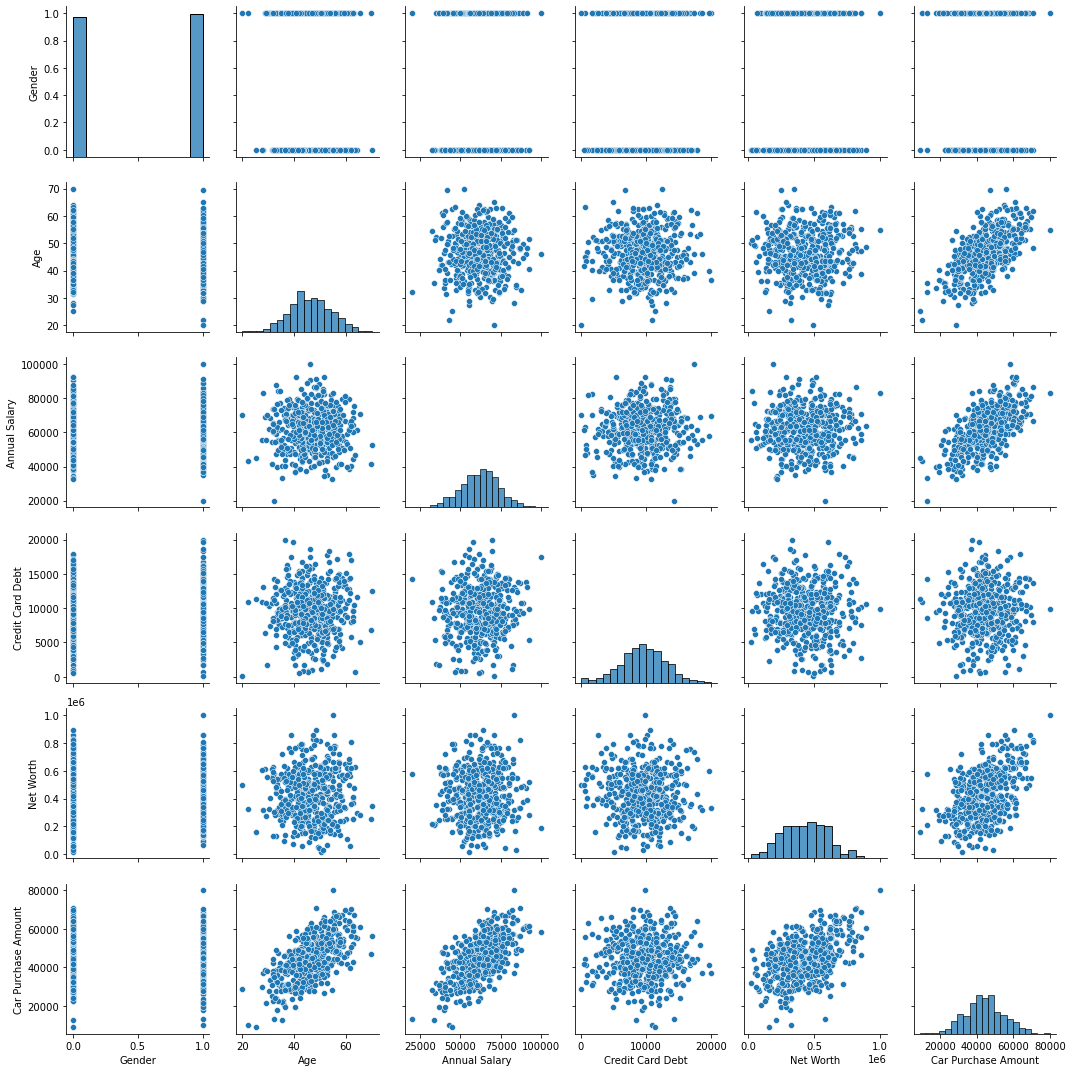

In [6]:
sns.pairplot(raw_dataset, height=2.5)
plt.tight_layout()

**c. Making Heatmap**<br>
Above figeres are some data representation. Now we are proceding further to see the relation between each columns in more detail. For that **corelation function** is used and later **heatmap** is drawn. In the heatmap we can see the relation between each of the columns. 
- For higher value of corelation and lighter the colour in the heatmap the relation is stronger.
- For corelation 1 represents the same column both vertically and horizontally. Hence they have corelation as 1.

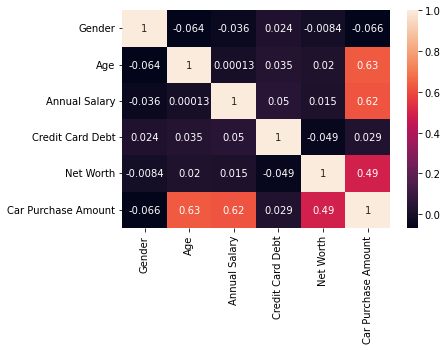

In [7]:
correl = raw_dataset.corr()                                                          # Finding the correlations
sns.heatmap(correl, annot = True)                                                    # Plotting the heatmap
plt.show()

From the above heatmap we can conclude that for the target variable which is price, (age and Annual Salary) are strongly related. We can notice that, column named as Customer name, email id, country are not showing in above figures. It is bacause, they donot contain neumeric characters.

**d. Dealing with non-numeric characters**<br>
One Hot Encoding is used here to convert categorical variables into dummy variables. By making dummy veriables, we are making categorical data to numeric data.<br> For this particular dataset, column named as 'Customer Name', 'Customer e-mail' and 'Country'  containing catagorical data. But we know by knownig customer's name and email id, we cannot make a model. So, these columns are removed from the dataset.

In [5]:
dataset = raw_dataset.drop(['Customer Name', 'Customer e-mail', 'Country'], axis=1)   
dataset

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


**e. Normalizing continuous data**<br>
It is important to normalize the data which are not in same unit. It help the model to work properly.

In [6]:
X = dataset.drop(['Car Purchase Amount'], axis = 1)                               # Removing the target variable from rest
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.        , 0.4370344 , 0.53515116, 0.57836085, 0.22342985],
       [0.        , 0.41741247, 0.58308616, 0.476028  , 0.52140195],
       [1.        , 0.46305795, 0.42248189, 0.55579674, 0.63108896],
       ...,
       [1.        , 0.67886994, 0.61110973, 0.52822145, 0.75972584],
       [1.        , 0.78321017, 0.37264988, 0.69914746, 0.3243129 ],
       [1.        , 0.53462305, 0.51713347, 0.46690159, 0.45198622]])

In [7]:
y = raw_dataset['Car Purchase Amount']                                             # Normalizing the target variable
y = y.values.reshape(-1,1)
y_scaled = scaler.fit_transform(y)
y_scaled

array([[0.37072477],
       [0.50866938],
       [0.47782689],
       [0.82285018],
       [0.66078116],
       [0.67059152],
       [0.28064374],
       [0.54133778],
       [0.54948752],
       [0.4111198 ],
       [0.70486638],
       [0.46885649],
       [0.27746526],
       [0.56702642],
       [0.57056385],
       [0.61996151],
       [0.46217916],
       [0.49157341],
       [0.50188722],
       [0.64545808],
       [0.59339372],
       [0.48453965],
       [0.53860366],
       [0.53007738],
       [0.50814651],
       [0.49841668],
       [0.3966416 ],
       [0.56467566],
       [0.6950749 ],
       [0.49287831],
       [0.12090943],
       [0.50211776],
       [0.80794216],
       [0.62661214],
       [0.43394857],
       [0.60017103],
       [0.42223485],
       [0.01538345],
       [0.37927499],
       [0.64539707],
       [0.51838974],
       [0.45869677],
       [0.26804521],
       [0.2650104 ],
       [0.84054134],
       [0.84401542],
       [0.35515157],
       [0.406

**h. Splitting dataset**

In [8]:
# Importing important libraries from sklearn for train-test split
from sklearn.model_selection import train_test_split

In [17]:
# Spliting data for traing and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)
X_train

array([[1.        , 0.57675044, 0.63937749, 0.48989939, 0.46986556],
       [0.        , 0.46285637, 0.32826783, 0.83755093, 0.75457088],
       [0.        , 0.48012067, 0.70306554, 0.30348683, 0.66754153],
       ...,
       [0.        , 0.37102039, 0.61560619, 0.31888367, 0.28392455],
       [1.        , 0.51505395, 0.54652502, 0.53323843, 0.30217184],
       [1.        , 0.90449762, 0.63379813, 0.2475058 , 0.27039974]])

## **4. Developing model**
Here artificial neural network is used to make the model. For this particular model features are given below:<br> (i) 3 hidden layer is made<br> (ii) Activation taken as **relu** and **linear** for the last layer<br> (iii) Optimizer is taken as **adam** and loss as **mean square error**

In [18]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

model = Sequential()
model.add(Dense(125, input_dim=5, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 125)               750       
                                                                 
 dense_6 (Dense)             (None, 25)                3150      
                                                                 
 dense_7 (Dense)             (None, 25)                650       
                                                                 
 dense_8 (Dense)             (None, 25)                650       
                                                                 
 dense_9 (Dense)             (None, 1)                 26        
                                                                 
Total params: 5,226
Trainable params: 5,226
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='adam', loss='mean_squared_error')     

In [20]:
epochs_hist=model.fit(X_train, y_train, epochs=25, batch_size=25, verbose=1, validation_split=0.2)        # Model training 

Epoch 1/25
12/12 [==============================] - 1s 8ms/step - loss: 0.1276 - val_loss: 0.0178
Epoch 2/25
12/12 [==============================] - 0s 2ms/step - loss: 0.0248 - val_loss: 0.0146
Epoch 3/25
12/12 [==============================] - 0s 2ms/step - loss: 0.0150 - val_loss: 0.0155
Epoch 4/25
12/12 [==============================] - 0s 2ms/step - loss: 0.0105 - val_loss: 0.0105
Epoch 5/25
12/12 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.0088
Epoch 6/25
12/12 [==============================] - 0s 2ms/step - loss: 0.0060 - val_loss: 0.0063
Epoch 7/25
12/12 [==============================] - 0s 2ms/step - loss: 0.0045 - val_loss: 0.0049
Epoch 8/25
12/12 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0036
Epoch 9/25
12/12 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0026
Epoch 10/25
12/12 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 11/25
12/12 [

In [21]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

## 5. Postprocessing
After training the model, its time time to see the result. So in the below graph, we can see the ammount of loss with each training repeatation.

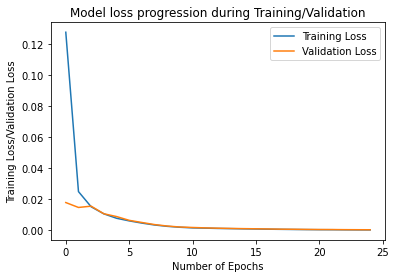

In [22]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model loss progression during Training/Validation')
plt.ylabel('Training Loss/Validation Loss')
plt.xlabel('Number of Epochs')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

From the above graph, we can conclude that as we repeat the training, the model is giving better result with less losses. In this particular model, we can see the graph is almost exponential.

In [23]:
y_predict = model.predict(X_test)
y_predict

array([[0.32521904],
       [0.51074713],
       [0.6840268 ],
       [0.5365885 ],
       [0.39180273],
       [0.42789316],
       [0.2661365 ],
       [0.42472184],
       [0.43403846],
       [0.47663015],
       [0.60166556],
       [0.39092928],
       [0.2530678 ],
       [0.4335869 ],
       [0.5459115 ],
       [0.49647662],
       [0.74098337],
       [0.55403763],
       [0.5942275 ],
       [0.33281162],
       [0.5094188 ],
       [0.50520986],
       [0.30641982],
       [0.48888195],
       [0.5223375 ],
       [0.538505  ],
       [0.5709628 ],
       [0.41770774],
       [0.5323363 ],
       [0.3989902 ],
       [0.5046611 ],
       [0.5599393 ],
       [0.53260094],
       [0.61942714],
       [0.519382  ],
       [0.5329834 ],
       [0.8064426 ],
       [0.5690014 ],
       [0.38326585],
       [0.46345258],
       [0.65242434],
       [0.5925043 ],
       [0.5794245 ],
       [0.49295792],
       [0.5428818 ],
       [0.62077016],
       [0.82941145],
       [0.602

In [24]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.9935718087096532

Ultimately, we are comparimg the predicted result with the given values, and we can see it is giving around 99% accuracy. Although this accuracy changes as we train again and again.